# Dependências e tema dos plots

In [ ]:
!pip install cryptography

In [ ]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives.asymmetric import rsa, padding
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# mostre todas as colunas
pd.set_option('display.max_columns', None)

In [ ]:
# Definir o tema personalizado
sns.set_theme(
    style="whitegrid",
    palette="dark",
    font='sans-serif',
    font_scale=1.3,
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.figsize": (10, 6),
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "text.color": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.titlecolor": "black",
    }
)

# Aumentar a resolução das figuras
%config InlineBackend.figure_format = 'retina'

# Experimento

### Funções

Função para medição de tempo

In [ ]:
def realizar_medicao(op, args_op, n):
    tempos = []
    for _ in range(n):
      start = time.process_time_ns()
      op(*args_op)
      end = time.process_time_ns()
      tempos.append(end - start)

    return np.array(tempos)

Funções para plots

In [ ]:
def plot_distribuicao_freq(resultados):
    fig, axs = plt.subplots(len(resultados.columns)//2, 2, figsize=(18, 36))
    # fig.suptitle("Distribuições por Criptografia", fontsize=16)

    for ax, col in zip(axs.flat, resultados.columns):
        ax.hist(resultados[col], bins=10)
        ax.set_title(f"Distribuição da criptografia {col}")
        ax.set_xlabel("Tempo (ms)")
        ax.set_ylabel("Frequência")
    # for col in resultados.columns:
    #     resultados[col].plot(kind='hist', bins=10)
    #     plt.title(f"Distribuição da curva {col}")
    #     plt.xlabel(f"Tempo (ms)")
    #     plt.ylabel("Frequência")
    #     plt.tight_layout()
    #     plt.show()
    plt.tight_layout()
    plt.show()

def plot_tempo_medio(resultados, title):
    mean_values = resultados.mean()
    std_values = resultados.std()

    # Sort by mean values
    sorted_means = mean_values.sort_values()
    sorted_stds = std_values[sorted_means.index]  # Reorder std to match sorted means

    # Plot with error bars
    plt.bar(sorted_means.index, sorted_means, yerr=sorted_stds, capsize=5, error_kw = {"ecolor": "red"})
    plt.xlabel("Criptografia")
    plt.ylabel("Tempo médio (ms)")
    plt.title(title)
    plt.xticks(rotation=76)
    plt.yscale("log")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### Curvas e Parâmetros de RSA

In [ ]:
curvas = [
          ec.SECT163K1(),
          ec.SECT163R2(),
          ec.SECP192R1(),
          ec.SECP224R1(),
          ec.SECT233K1(),
          ec.SECT233R1(),
          ec.SECP256R1(),
          ec.SECP256K1(),
          ec.BrainpoolP256R1(),
          ec.SECT283K1(),
          ec.SECT283R1(),
          ec.SECP384R1(),
          ec.BrainpoolP384R1(),
          ec.SECT409K1(),
          ec.SECT409R1(),
          ec.SECP521R1(),
          ec.BrainpoolP512R1(),
          ec.SECT571K1(),
          ec.SECT571R1(),
        ]

rsa_configs = [(65537, 1024),
               (65537, 2048),
               (65537, 4096)
              ]

## Geração de Chave

In [ ]:
n = 100
tempos = {}

for curva in curvas:
  tempo_curva = realizar_medicao(ec.generate_private_key, [curva], n) / 1e6
  tempos[curva.name] = tempo_curva

for rsa_config in rsa_configs:
  tempo_curva = realizar_medicao(rsa.generate_private_key, rsa_config, n) / 1e6
  tempos[f'RSA_{rsa_config[-1]}'] = tempo_curva

resultados = pd.DataFrame(tempos)
resultados.describe()

sect163k1   sect163r2   secp192r1   secp224r1   sect233k1   sect233r1  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.229662    0.228593    0.236636    0.031857    0.259103    0.257924   
std      0.093341    0.068743    0.017729    0.010802    0.026937    0.008728   
min      0.182340    0.190051    0.227191    0.029990    0.244609    0.251201   
25%      0.184386    0.192676    0.228837    0.030150    0.246436    0.252900   
50%      0.191296    0.199470    0.230490    0.030249    0.250371    0.254215   
75%      0.223793    0.222110    0.237306    0.030355    0.259076    0.260011   
max      0.735552    0.641612    0.350090    0.136901    0.399531    0.304890   

        secp256r1   secp256k1  brainpoolP256r1   sect283k1   sect283r1  \
count  100.000000  100.000000       100.000000  100.000000  100.000000   
mean     0.025519    0.411777         0.385409    0.438718    0.626134   
std      0.013661    0.024841         0.058896    0.056099    0.204674   
min      0.022740    0.395811         0.360971    0.416140    0.439411   
25%      0.022990    0.399347         0.364714    0.420731    0.465656   
50%      0.023121    0.404745         0.370015    0.427526    0.629866   
75%      0.023383    0.412241         0.377103    0.433700    0.738767   
max      0.154880    0.602621         0.805651    0.941611    1.993605   

        secp384r1  brainpoolP384r1   sect409k1   sect409r1   secp521r1  \
count  100.000000       100.000000  100.000000  100.000000  100.000000   
mean     0.175375         0.918607    0.771066    0.834768    0.159754   
std      0.035883         0.124014    0.105028    0.111051    0.023642   
min      0.149710         0.847772    0.702821    0.746341    0.148580   
25%      0.150768         0.857793    0.717204    0.762726    0.149696   
50%      0.156314         0.875946    0.728451    0.783246    0.151255   
75%      0.197788         0.906662    0.772833    0.867539    0.158007   
max      0.264562         1.598812    1.211781    1.279932    0.314061   

       brainpoolP512r1   sect571k1   sect571r1    RSA_1024    RSA_2048  \
count       100.000000  100.000000  100.000000  100.000000  100.000000   
mean          1.348100    2.305144    3.067729   11.928749   67.947575   
std           0.204361    0.516323    0.347165    4.369872   34.438783   
min           1.230712    1.548172    1.746932    6.565029   18.235521   
25%           1.250159    1.658210    2.915104    9.332814   41.079018   
50%           1.274367    2.578609    3.090555   11.186649   67.167558   
75%           1.313957    2.700147    3.229475   13.660839   85.895904   
max           2.236302    3.122405    4.056167   31.229840  176.417640   

          RSA_4096  
count   100.000000  
mean    618.514457  
std     418.771084  
min      45.672584  
25%     317.399938  
50%     520.762006  
75%     828.758169  
max    2329.857254

### Distribuição de frequência

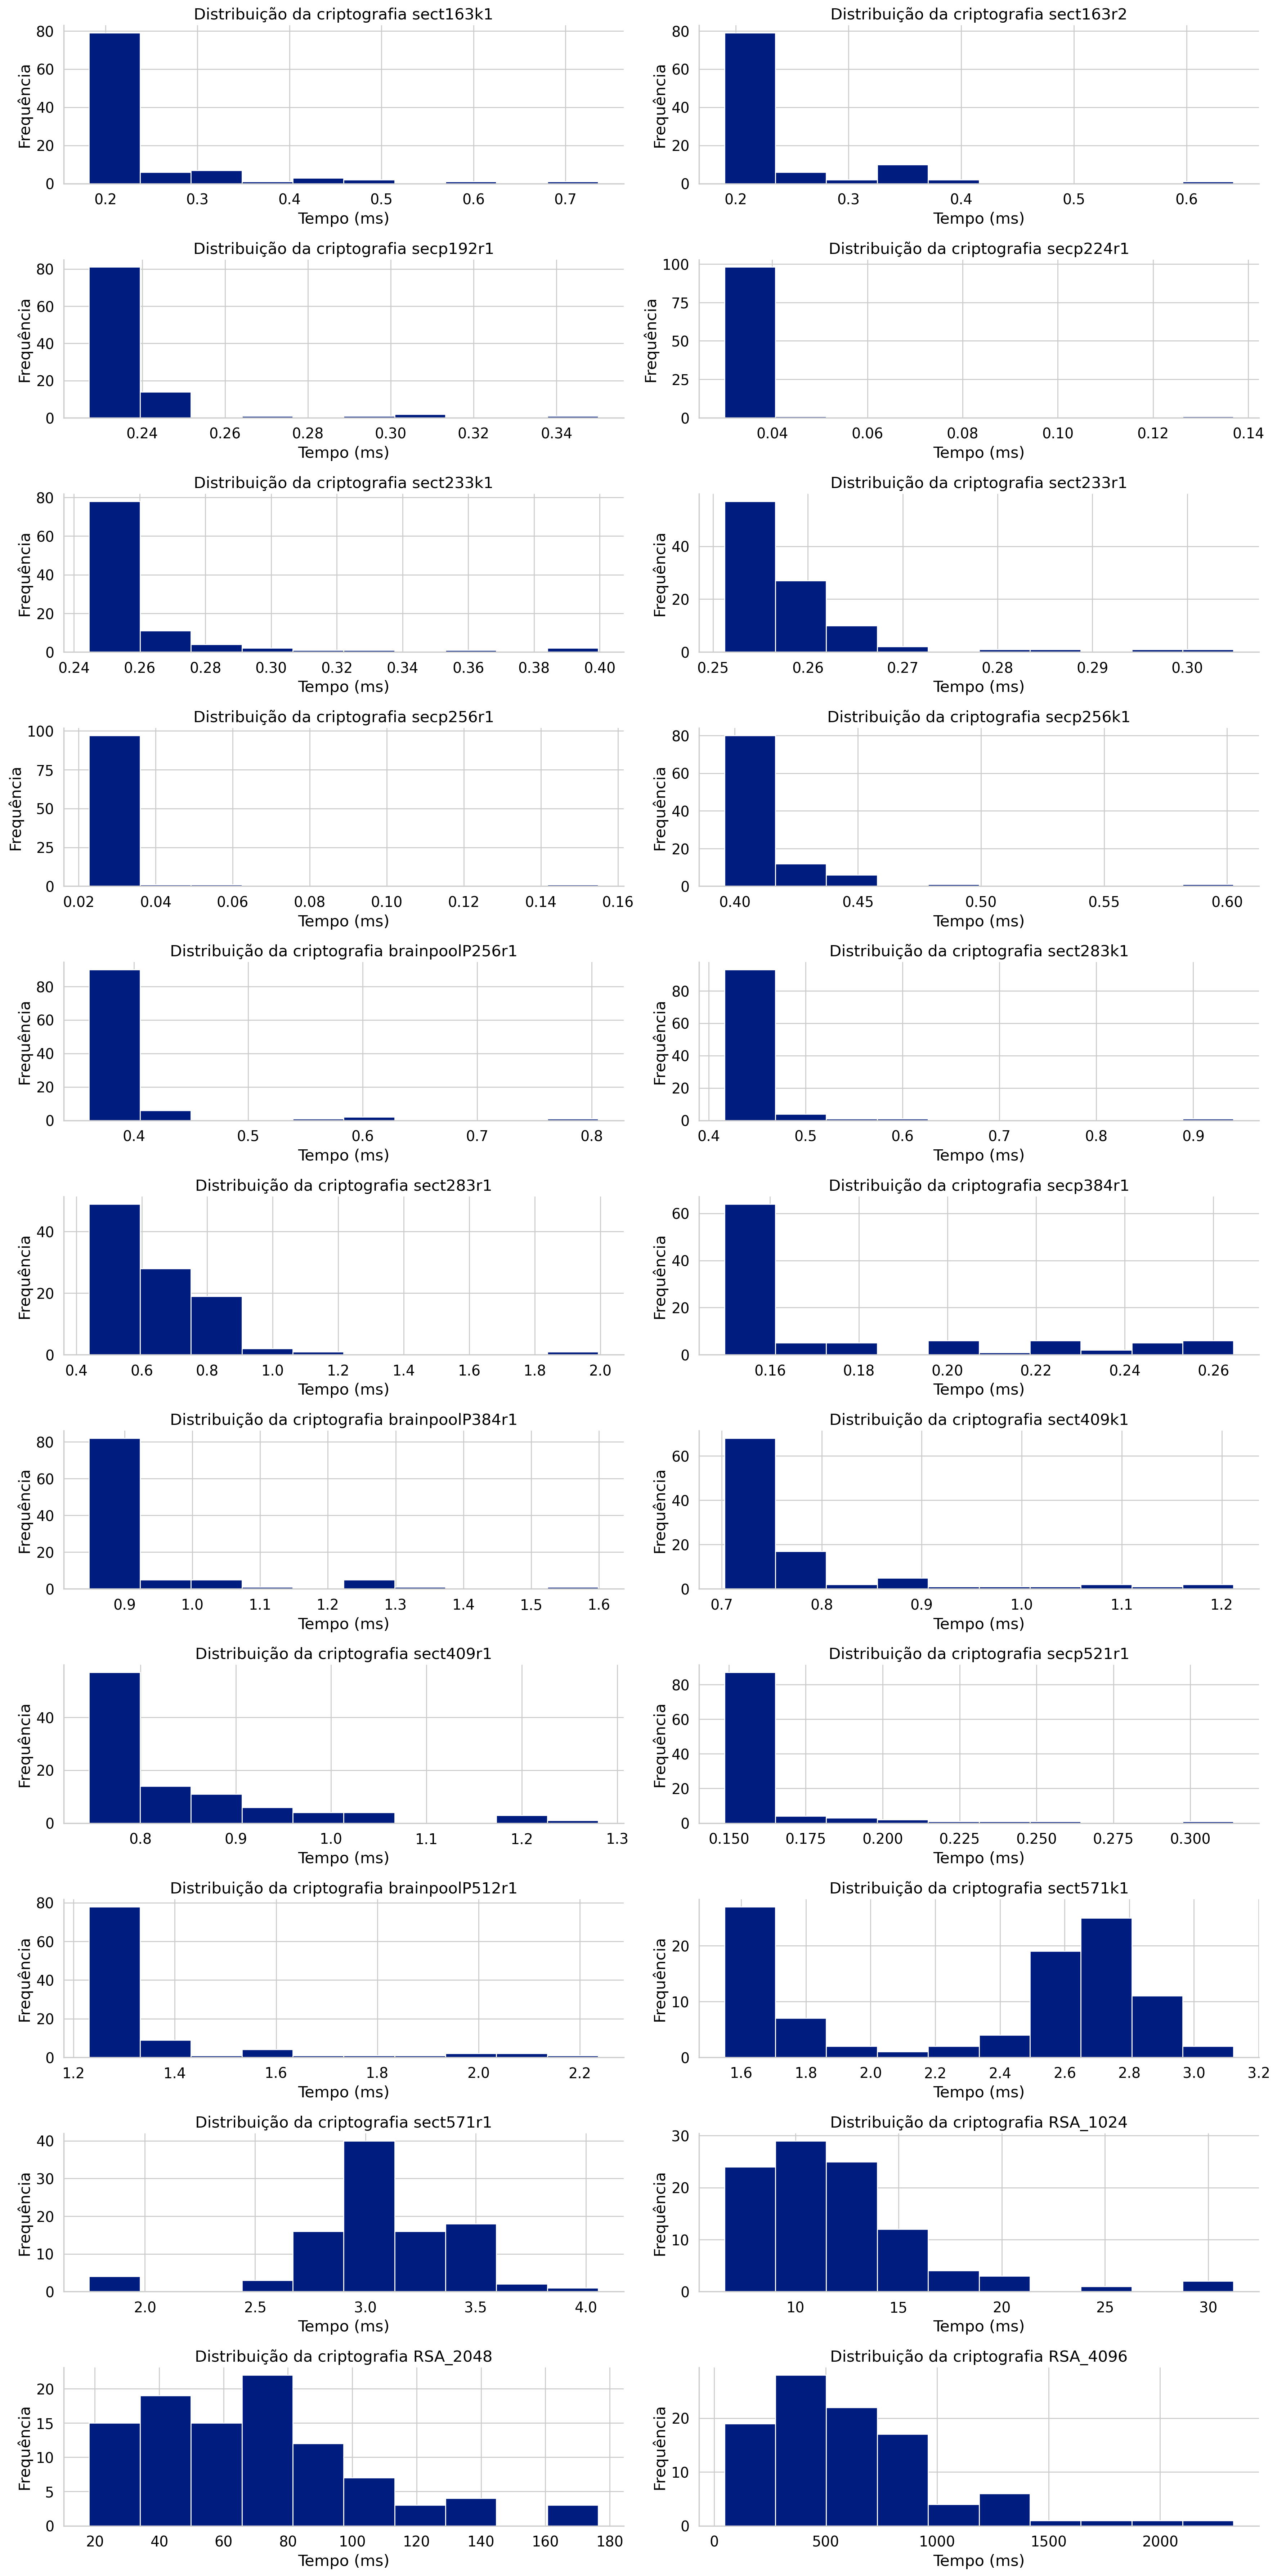

In [ ]:
plot_distribuicao_freq(resultados)

### Tempo Médio

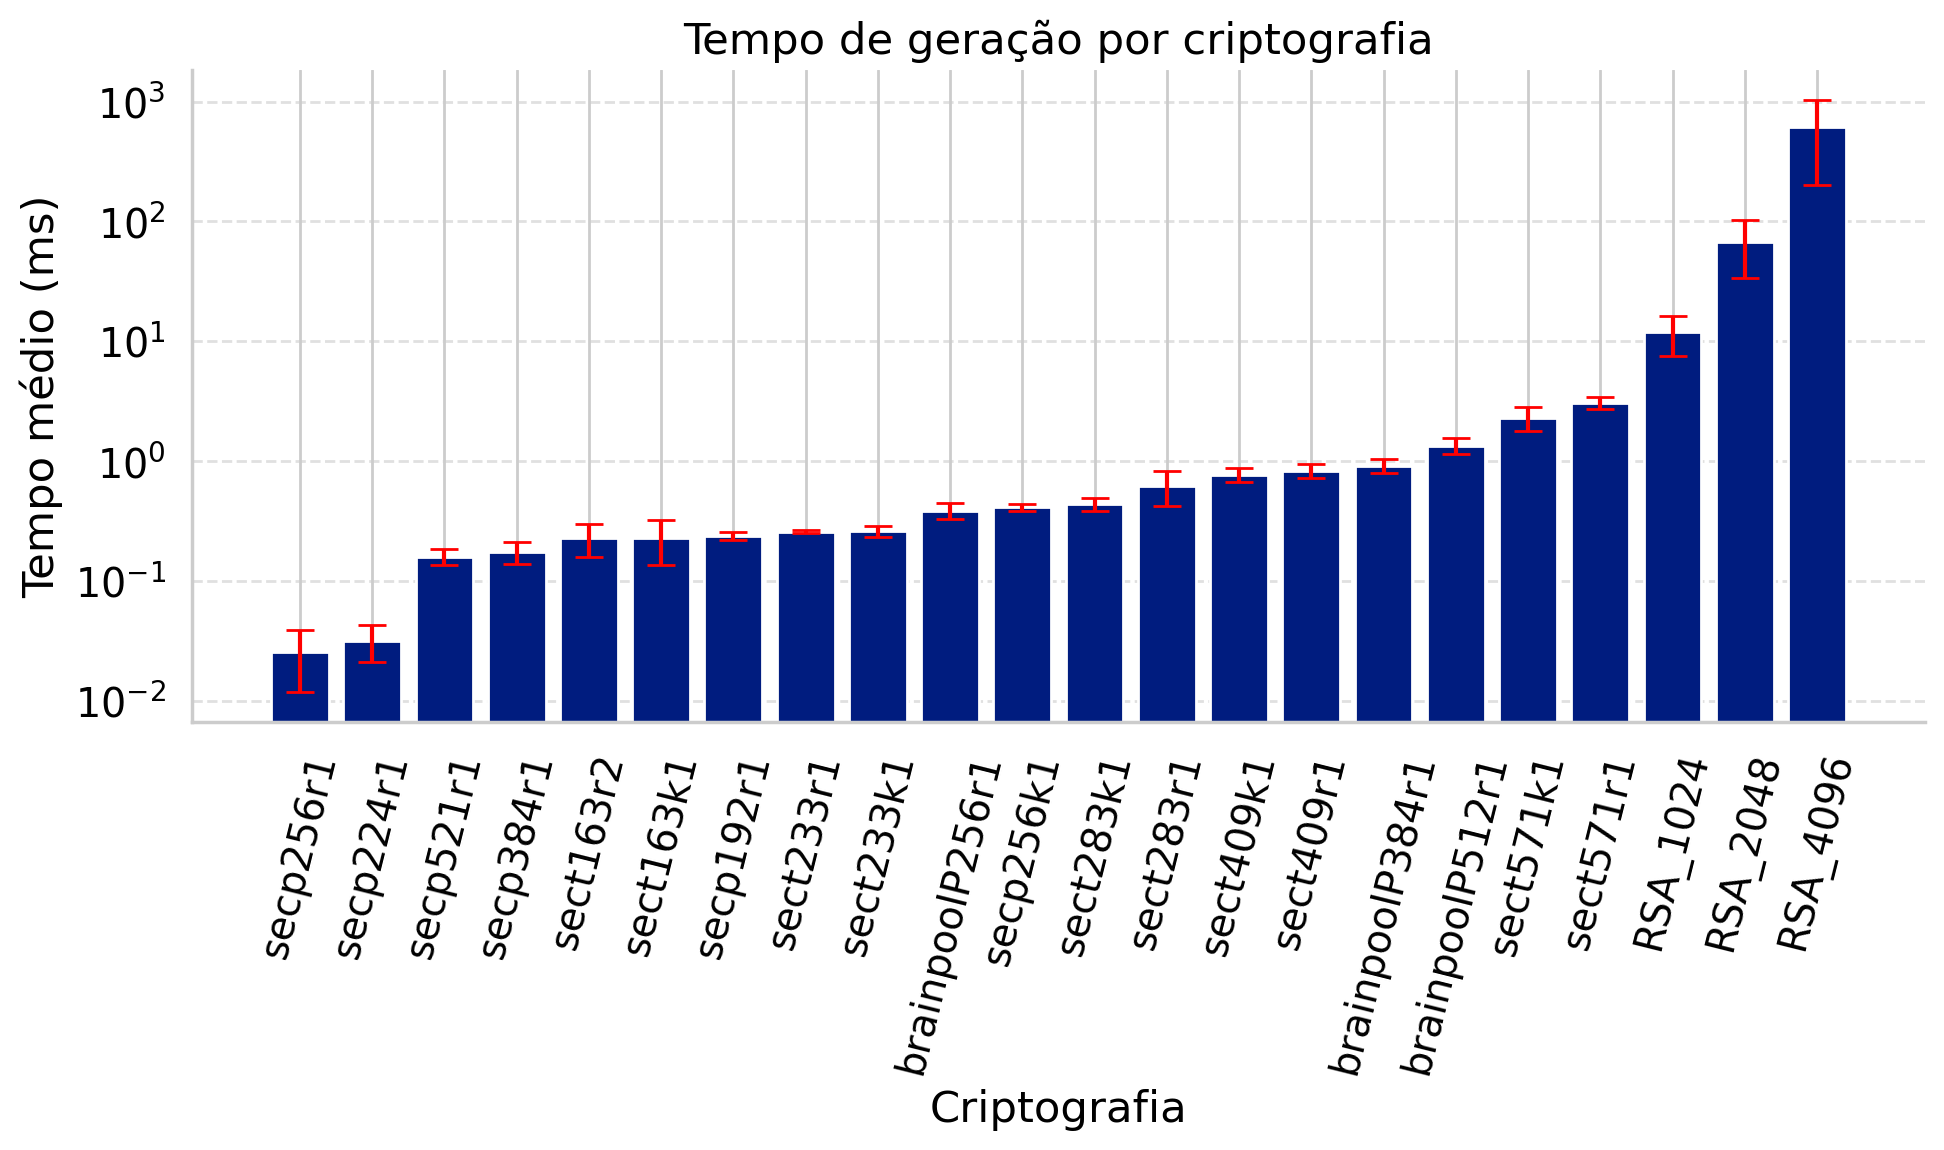

In [ ]:
plot_tempo_medio(resultados, "Tempo de geração por criptografia")

## Assinatura

In [ ]:
def aux_curve_sign(curva):
  return ec.generate_private_key(curva)

def aux_rsa_sign(rsa_config):
  return rsa.generate_private_key(*rsa_config)

In [ ]:
n = 100
tempos = {}
data = b'Uma mensagem a ser assinada'
for curva in curvas:
  private_key = aux_curve_sign(curva)
  tempo_curva = realizar_medicao(private_key.sign, [data, ec.ECDSA(hashes.SHA256())], n) / 1e6
  tempos[curva.name] = tempo_curva

for rsa_config in rsa_configs:
  private_key = aux_rsa_sign(rsa_config)
  tempo_curva = realizar_medicao(private_key.sign, [data, padding.PSS(
                                                 mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256()], n) / 1e6
  tempos[f'RSA_{rsa_config[-1]}'] = tempo_curva

resultados = pd.DataFrame(tempos)
resultados.describe()

sect163k1   sect163r2   secp192r1   secp224r1   sect233k1   sect233r1  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.372516    0.373289    0.425977    0.098419    0.499079    0.525599   
std      0.052805    0.052684    0.031869    0.023593    0.156121    0.067357   
min      0.303491    0.291161    0.367630    0.073510    0.388201    0.453451   
25%      0.353264    0.342758    0.406723    0.086675    0.456378    0.496174   
50%      0.368985    0.369811    0.420442    0.091420    0.488927    0.514972   
75%      0.384571    0.389086    0.436292    0.102890    0.508709    0.533840   
max      0.809831    0.599752    0.545561    0.247701    1.978142    0.993791   

        secp256r1   secp256k1  brainpoolP256r1   sect283k1   sect283r1  \
count  100.000000  100.000000       100.000000  100.000000  100.000000   
mean     0.043101    0.690372         0.601179    0.817209    0.837143   
std      0.017897    0.045238         0.062564    0.089144    0.075734   
min      0.036251    0.614862         0.548602    0.698171    0.701381   
25%      0.038355    0.650267         0.568616    0.765592    0.789224   
50%      0.039190    0.685781         0.580661    0.799092    0.835521   
75%      0.042696    0.730673         0.614839    0.848856    0.867864   
max      0.211420    0.831861         0.958232    1.278592    1.291573   

        secp384r1  brainpoolP384r1   sect409k1   sect409r1   secp521r1  \
count  100.000000       100.000000  100.000000  100.000000  100.000000   
mean     0.348174         1.453079    1.420447    1.476601    0.442863   
std      0.024703         0.191078    0.084091    0.151626    0.050488   
min      0.282560         0.969832    1.133171    1.234403    0.373450   
25%      0.336881         1.392545    1.392463    1.398768    0.421121   
50%      0.348911         1.429202    1.418253    1.476787    0.432805   
75%      0.362055         1.475496    1.437284    1.511135    0.443905   
max      0.436080         2.828597    1.930223    2.330204    0.702442   

       brainpoolP512r1   sect571k1   sect571r1    RSA_1024    RSA_2048  \
count       100.000000  100.000000  100.000000  100.000000  100.000000   
mean          2.129926    2.037987    1.836800    0.113231    0.693528   
std           0.158147    0.493387    0.121529    0.042588    0.080564   
min           1.908913    1.661443    1.760643    0.101040    0.654321   
25%           2.067394    1.688253    1.773093    0.101426    0.664817   
50%           2.113903    1.752182    1.784048    0.102245    0.672157   
75%           2.148665    2.570894    1.823408    0.108215    0.682368   
max           3.050525    3.151636    2.391897    0.459130    1.165991   

         RSA_4096  
count  100.000000  
mean     4.760709  
std      0.260278  
min      4.544948  
25%      4.608225  
50%      4.661818  
75%      4.784388  
max      5.827278

### Distribuição de frequência

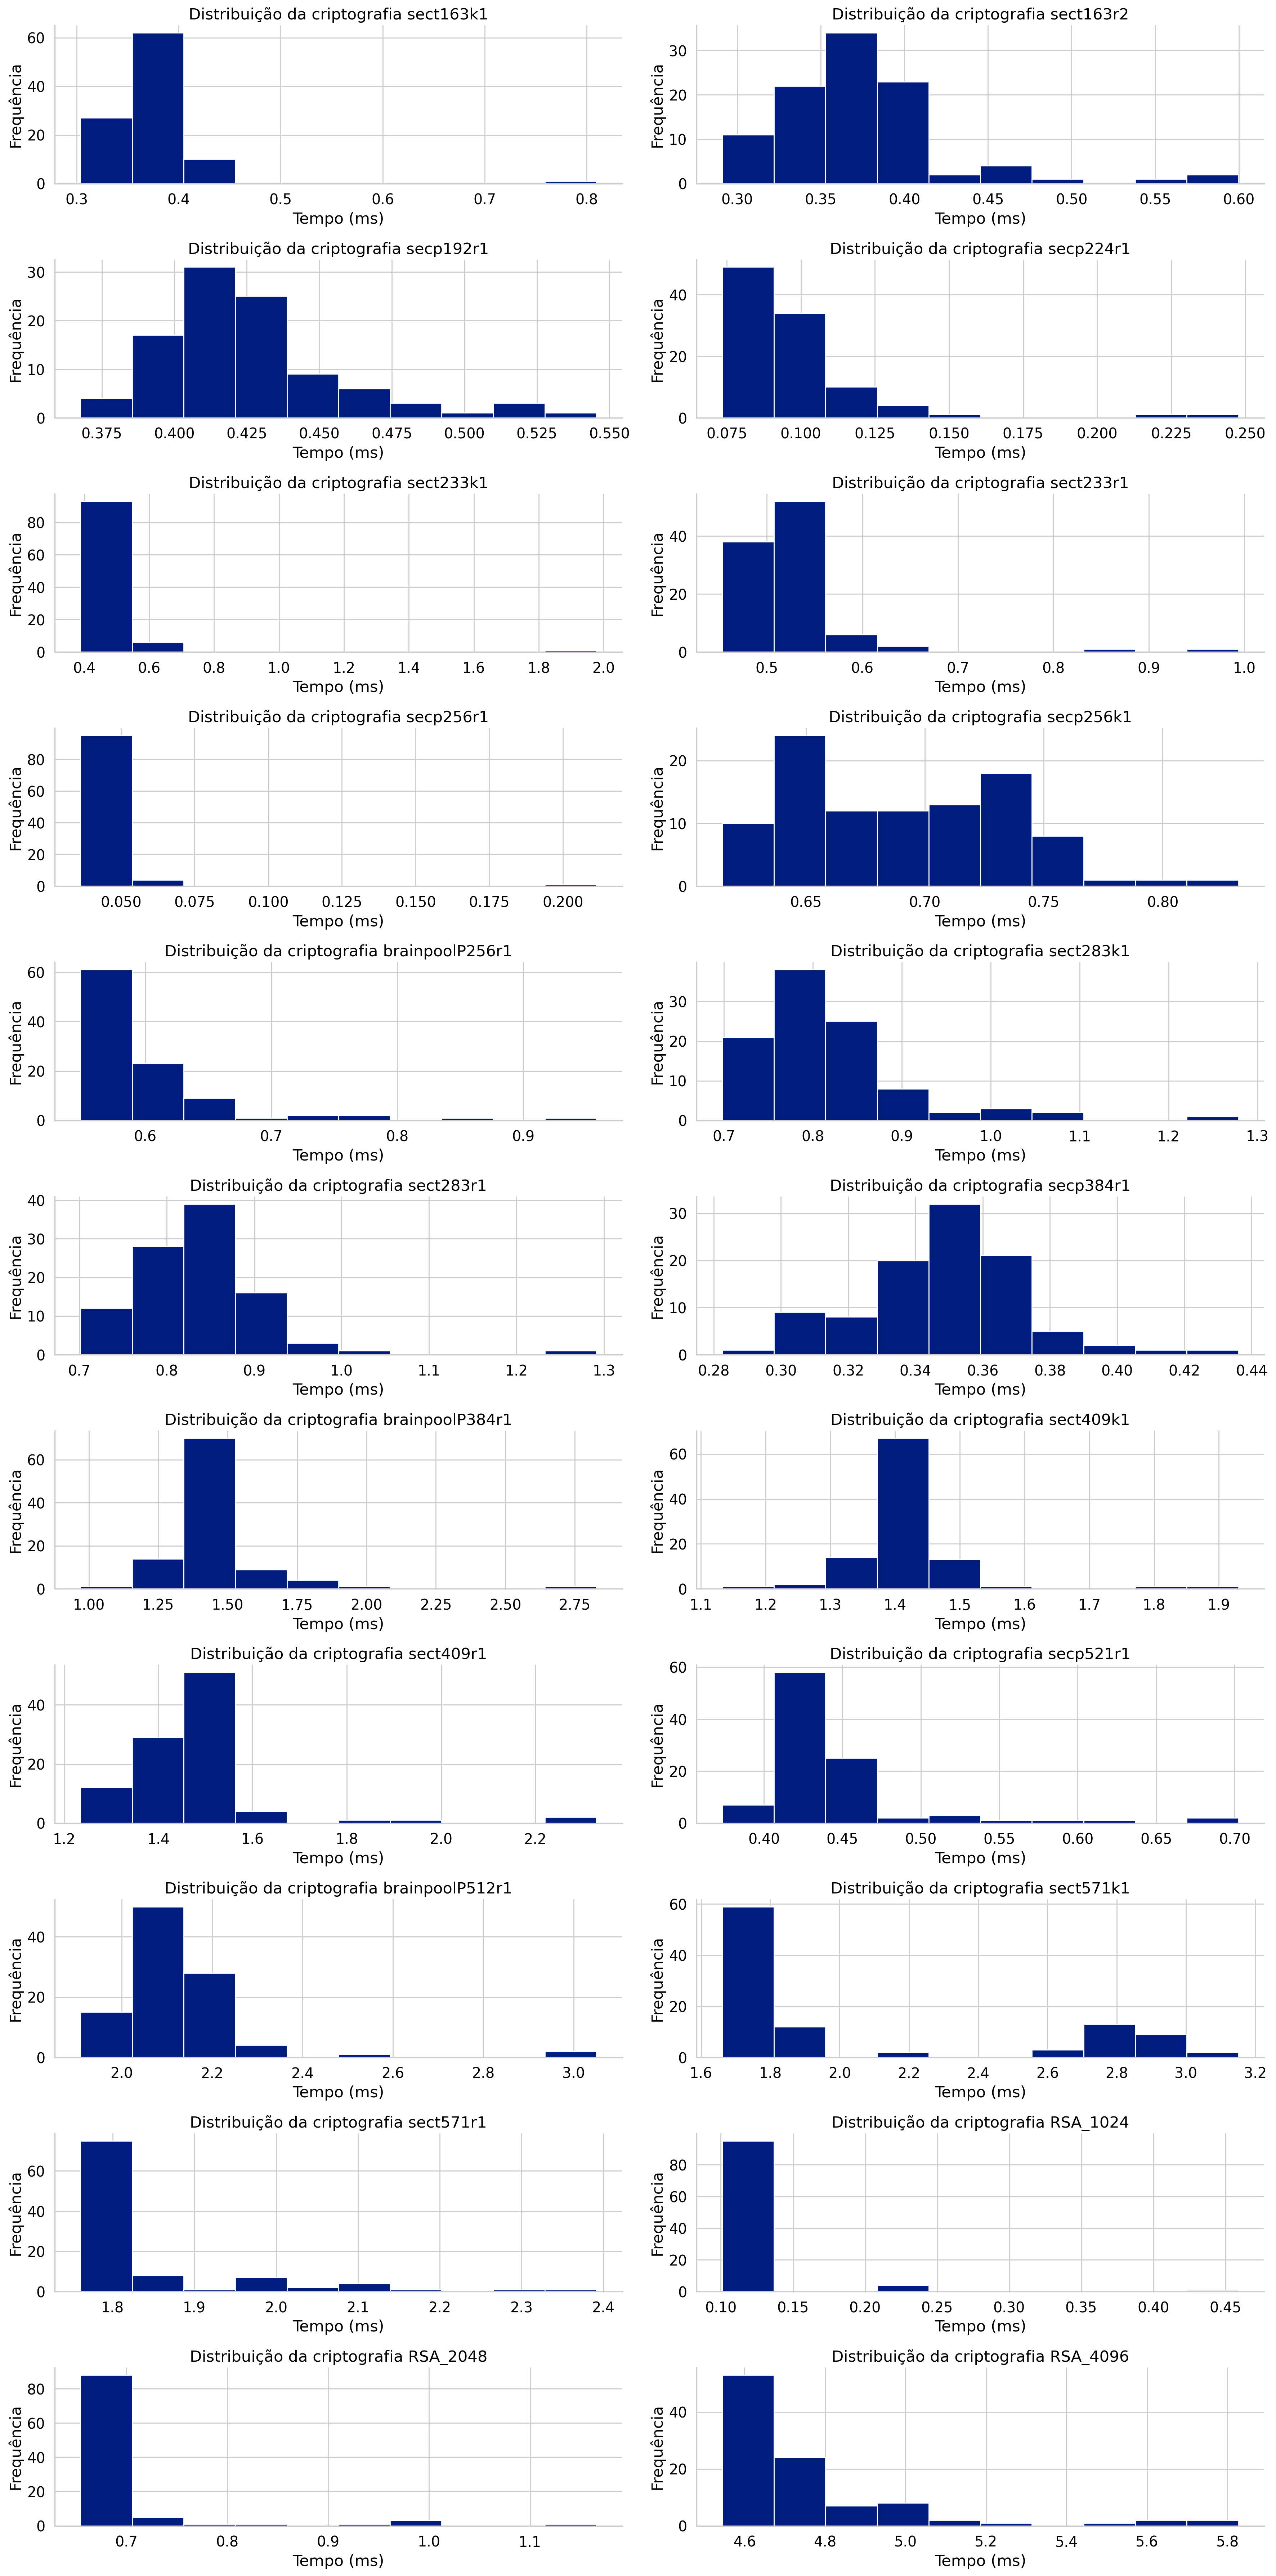

In [ ]:
plot_distribuicao_freq(resultados)

### Tempo Médio

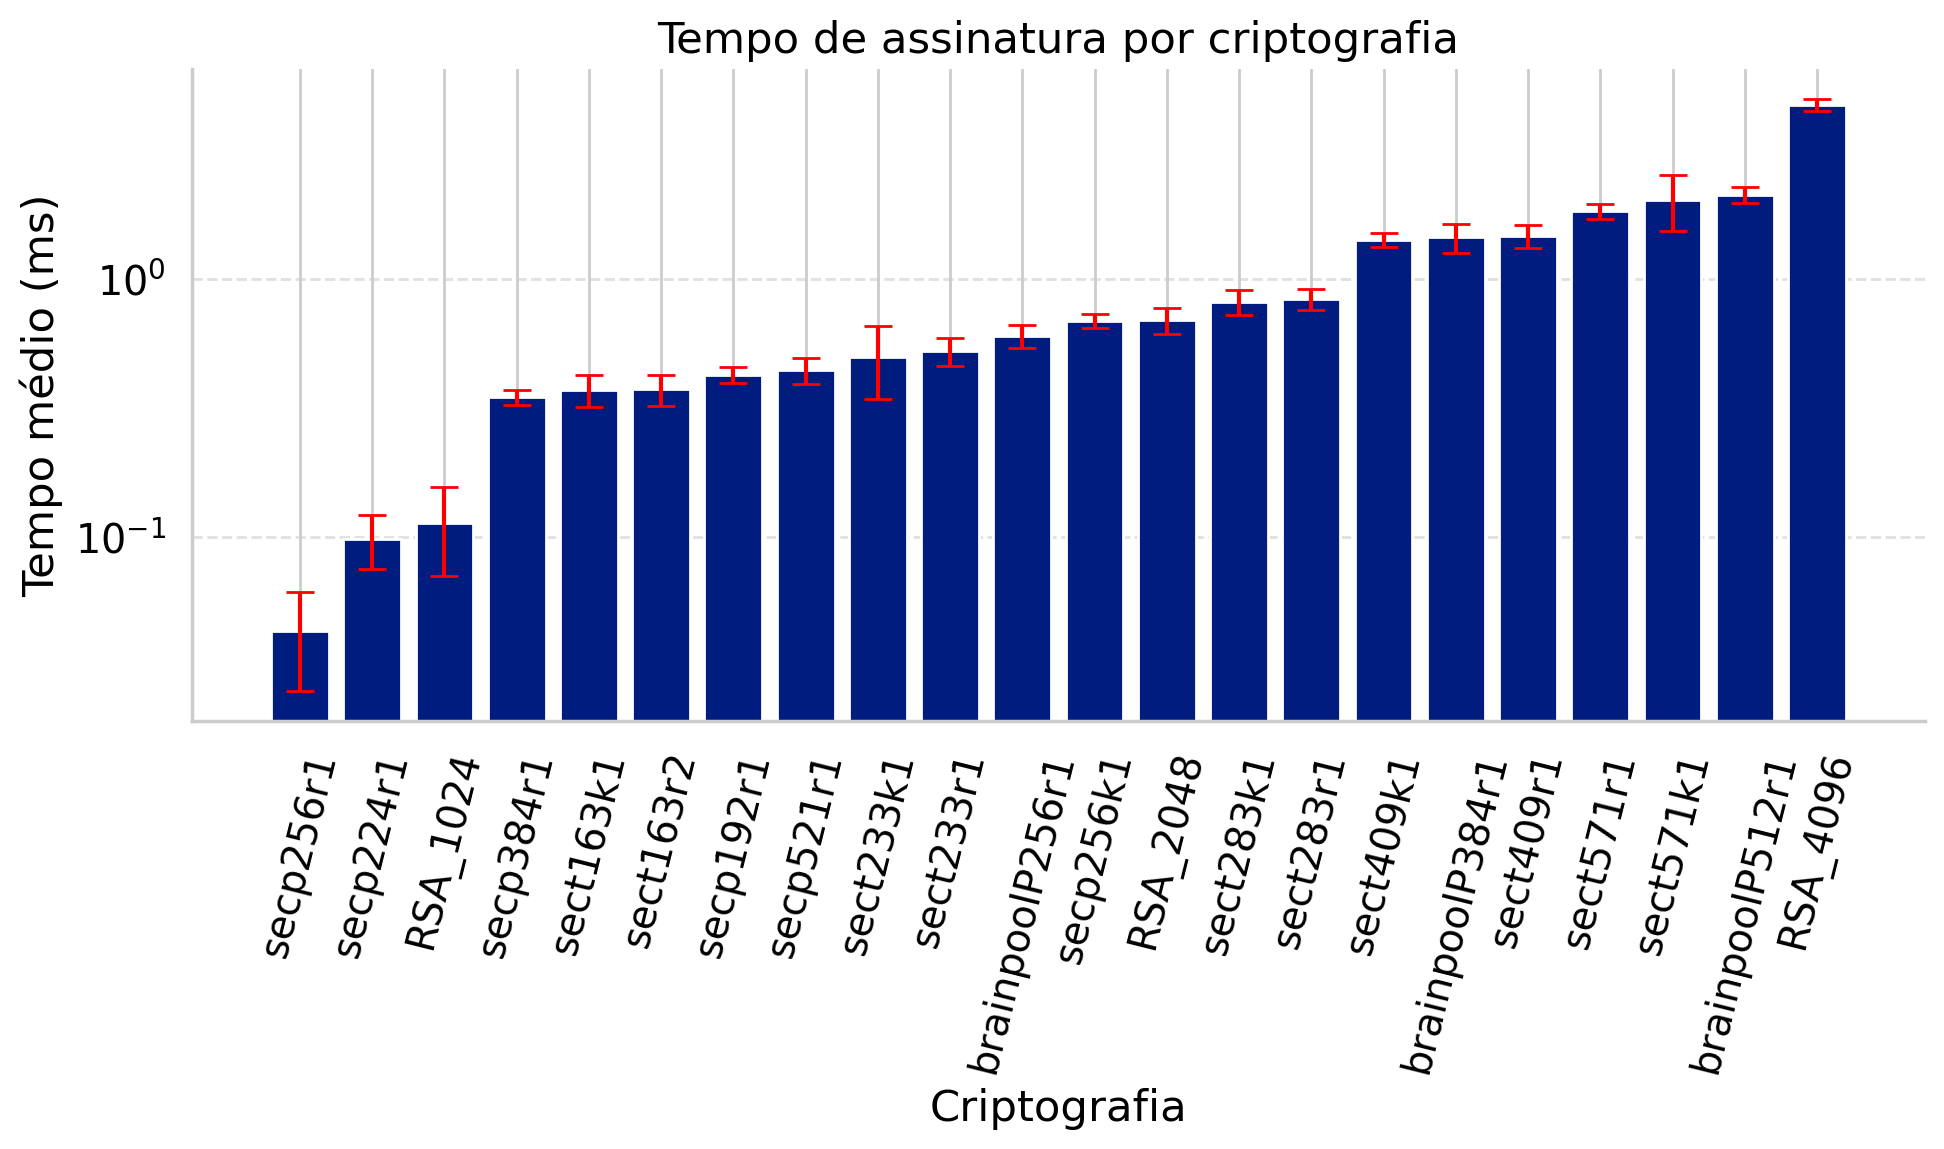

In [ ]:
plot_tempo_medio(resultados, "Tempo de assinatura por criptografia")

## Verificação

In [ ]:
def aux_curve_verify(curva, data):
  private_key = ec.generate_private_key(
      curva
  )
  signature = private_key.sign(
    data,
    ec.ECDSA(hashes.SHA256())
  )

  return private_key.public_key(), signature

def aux_rsa_verify(rsa_config, data):
  private_key = rsa.generate_private_key(
      *rsa_config
  )
  signature = private_key.sign(data, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                 salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())

  return private_key.public_key(), signature


In [ ]:
n = 100
tempos = {}
data = b'Uma mensagem a ser assinada'
for curva in curvas:
  public_key, sig = aux_curve_verify(curva, data)
  tempo_curva = realizar_medicao(public_key.verify, [sig, data, ec.ECDSA(hashes.SHA256())], n) / 1e6

  tempos[curva.name] = tempo_curva

for rsa_config in rsa_configs:

  public_key, sig = aux_rsa_verify(rsa_config, data)
  tempo_curva = realizar_medicao(public_key.verify, [sig, data, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                                salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256()], n) / 1e6

  tempos[f'RSA_{rsa_config[-1]}'] = tempo_curva

resultados = pd.DataFrame(tempos)
resultados.describe()

sect163k1   sect163r2   secp192r1   secp224r1   sect233k1   sect233r1  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.468442    0.437669    0.238402    0.120305    0.667038    0.555155   
std      0.149902    0.099763    0.041638    0.071311    0.187748    0.064359   
min      0.362800    0.379570    0.214249    0.091130    0.498180    0.512451   
25%      0.372578    0.388479    0.216900    0.092780    0.519539    0.524335   
50%      0.380246    0.395516    0.222351    0.100165    0.549891    0.533675   
75%      0.605759    0.424948    0.232612    0.127245    0.897556    0.553355   
max      1.018472    0.937541    0.408101    0.708023    1.089792    0.928513   

        secp256r1   secp256k1  brainpoolP256r1   sect283k1   sect283r1  \
count  100.000000  100.000000       100.000000  100.000000  100.000000   
mean     0.076462    0.384038         0.397232    0.922844    0.929191   
std      0.007450    0.046881         0.044743    0.103136    0.045338   
min      0.071619    0.361331         0.356671    0.859792    0.899881   
25%      0.072185    0.368144         0.365633    0.871477    0.913039   
50%      0.072965    0.372161         0.378256    0.883861    0.916797   
75%      0.077877    0.378078         0.425324    0.918434    0.929161   
max      0.116100    0.677341         0.567180    1.409133    1.325270   

        secp384r1  brainpoolP384r1   sect409k1   sect409r1   secp521r1  \
count  100.000000       100.000000  100.000000  100.000000  100.000000   
mean     0.482456         0.783622    1.521144    1.580791    0.514845   
std      0.029003         0.027197    0.098234    0.042377    0.020177   
min      0.463882         0.762771    1.470912    1.551102    0.499961   
25%      0.470603         0.770704    1.481750    1.559028    0.505476   
50%      0.474696         0.775796    1.489202    1.563918    0.507786   
75%      0.482768         0.782299    1.520058    1.583198    0.514018   
max      0.715051         0.933042    2.303024    1.795213    0.648963   

       brainpoolP512r1   sect571k1   sect571r1    RSA_1024    RSA_2048  \
count       100.000000  100.000000  100.000000  100.000000  100.000000   
mean          1.514061    5.863597    5.860292    0.017618    0.029487   
std           0.360319    0.478346    0.654612    0.014052    0.005094   
min           1.062542    3.684166    3.452206    0.014400    0.027840   
25%           1.117965    5.768497    5.741642    0.014578    0.028051   
50%           1.661868    5.914236    5.949325    0.014690    0.028146   
75%           1.791701    5.996645    6.288831    0.014935    0.028493   
max           2.463993    6.815942    7.478324    0.131521    0.071059   

         RSA_4096  
count  100.000000  
mean     0.084243  
std      0.021563  
min      0.078291  
25%      0.078617  
50%      0.078870  
75%      0.080373  
max      0.216090

### Distribuição de frequência

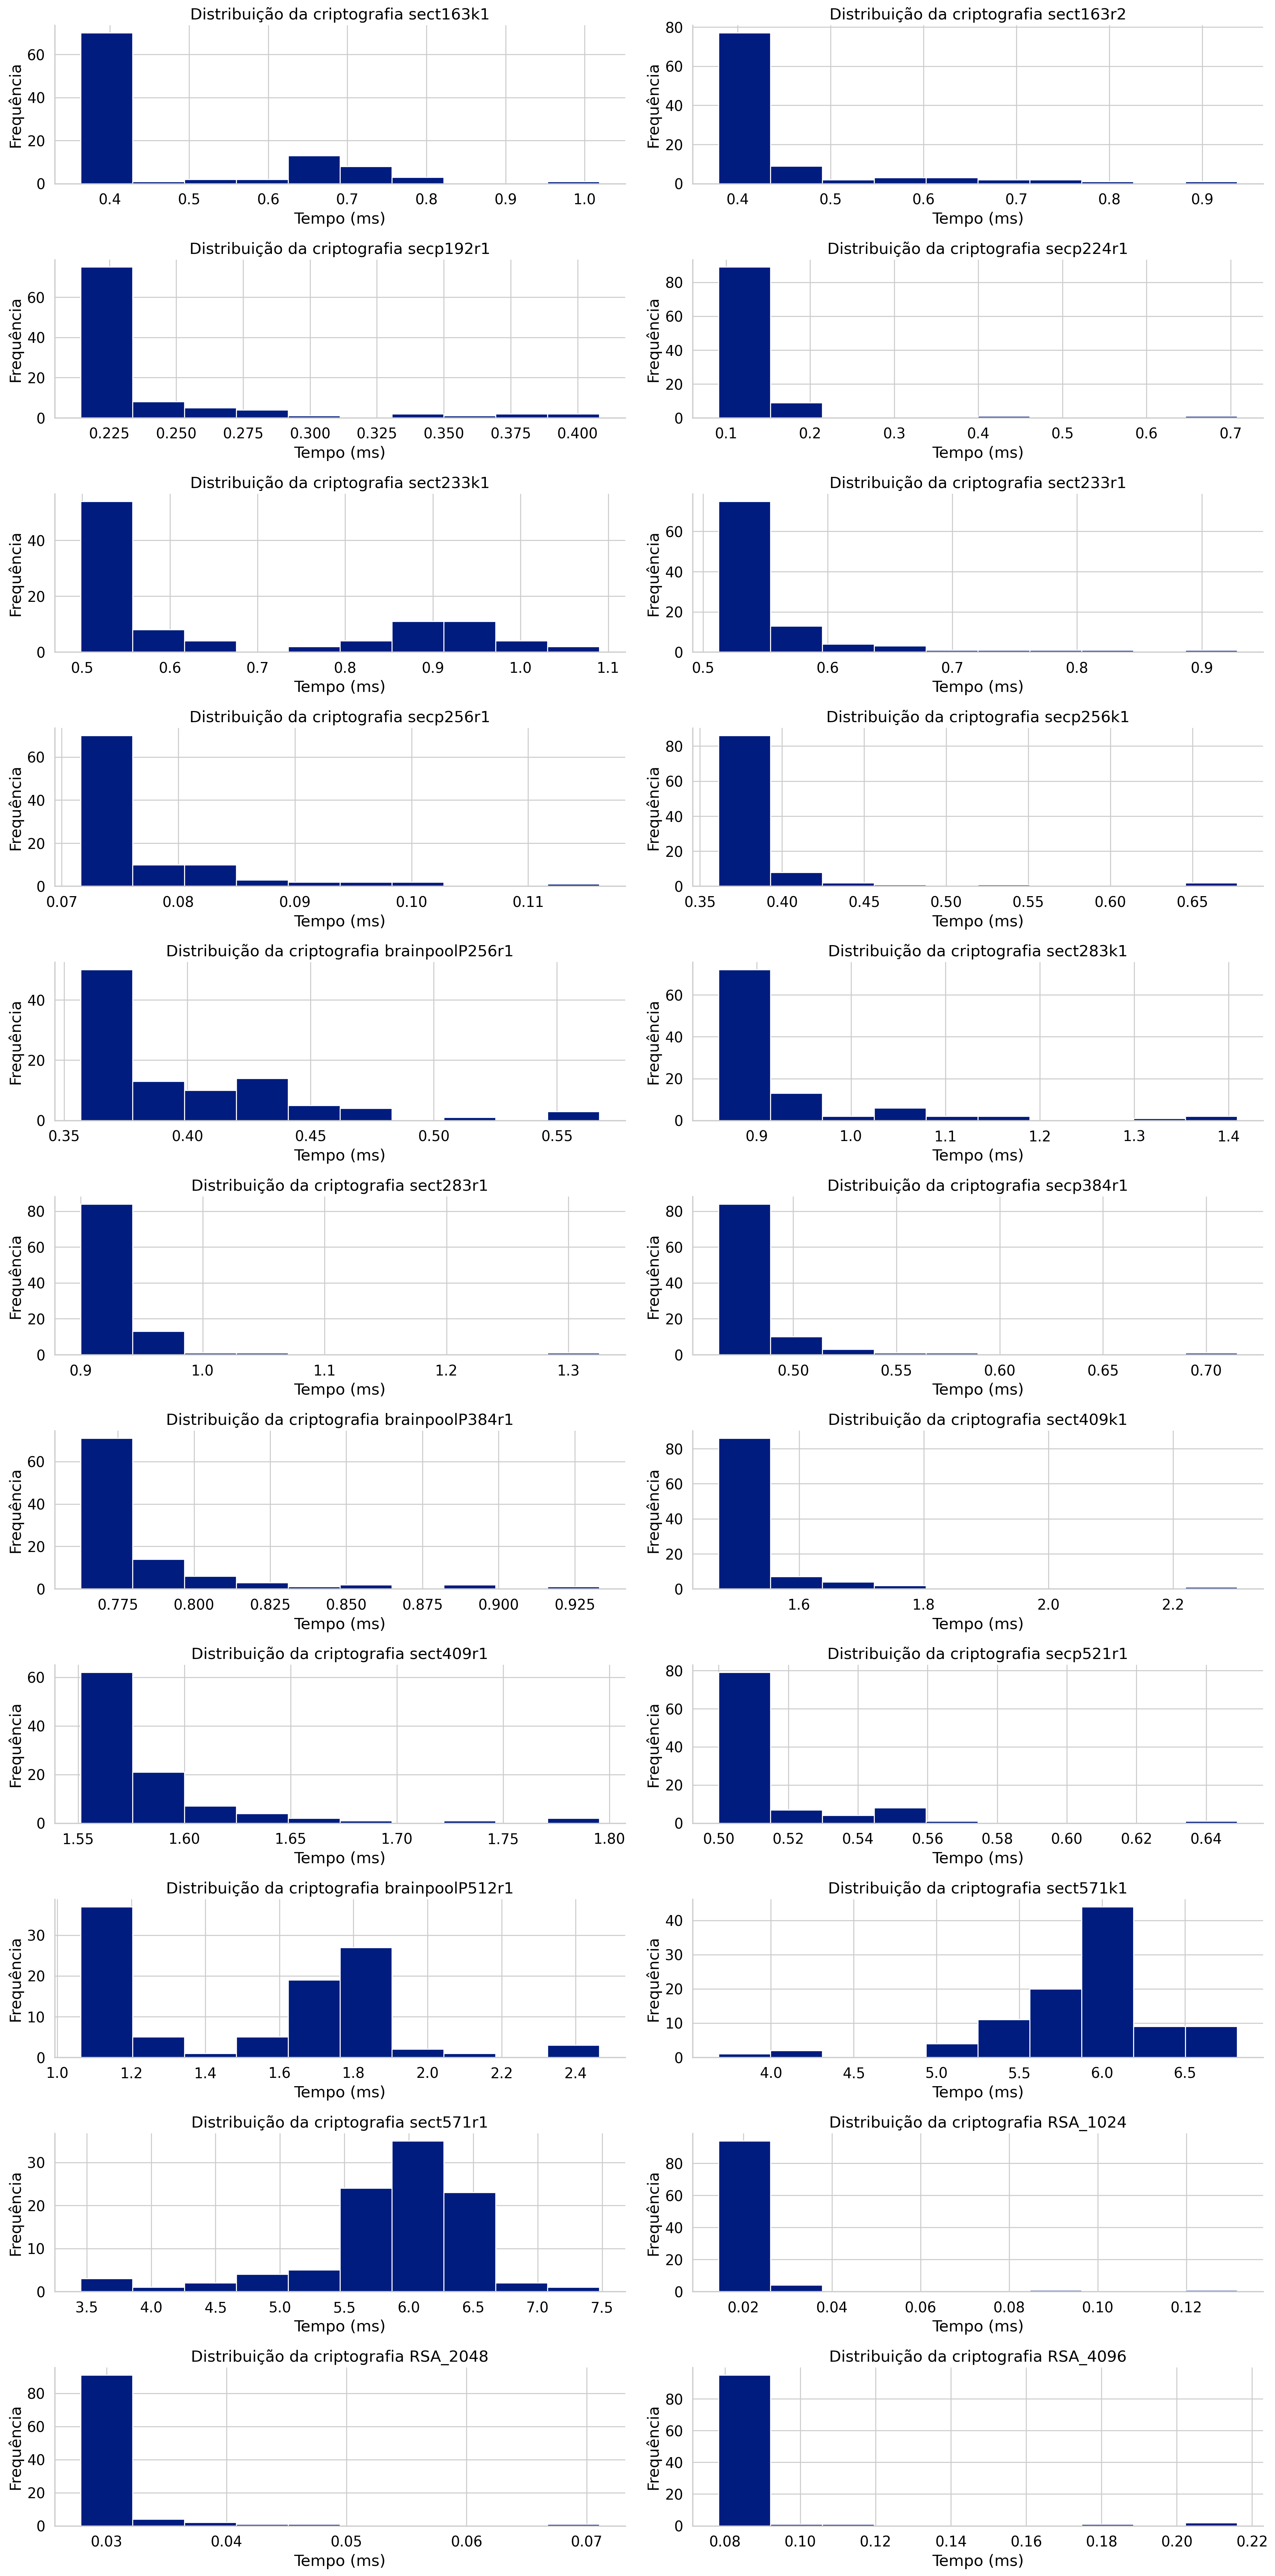

In [ ]:
plot_distribuicao_freq(resultados)

### Tempo Médio

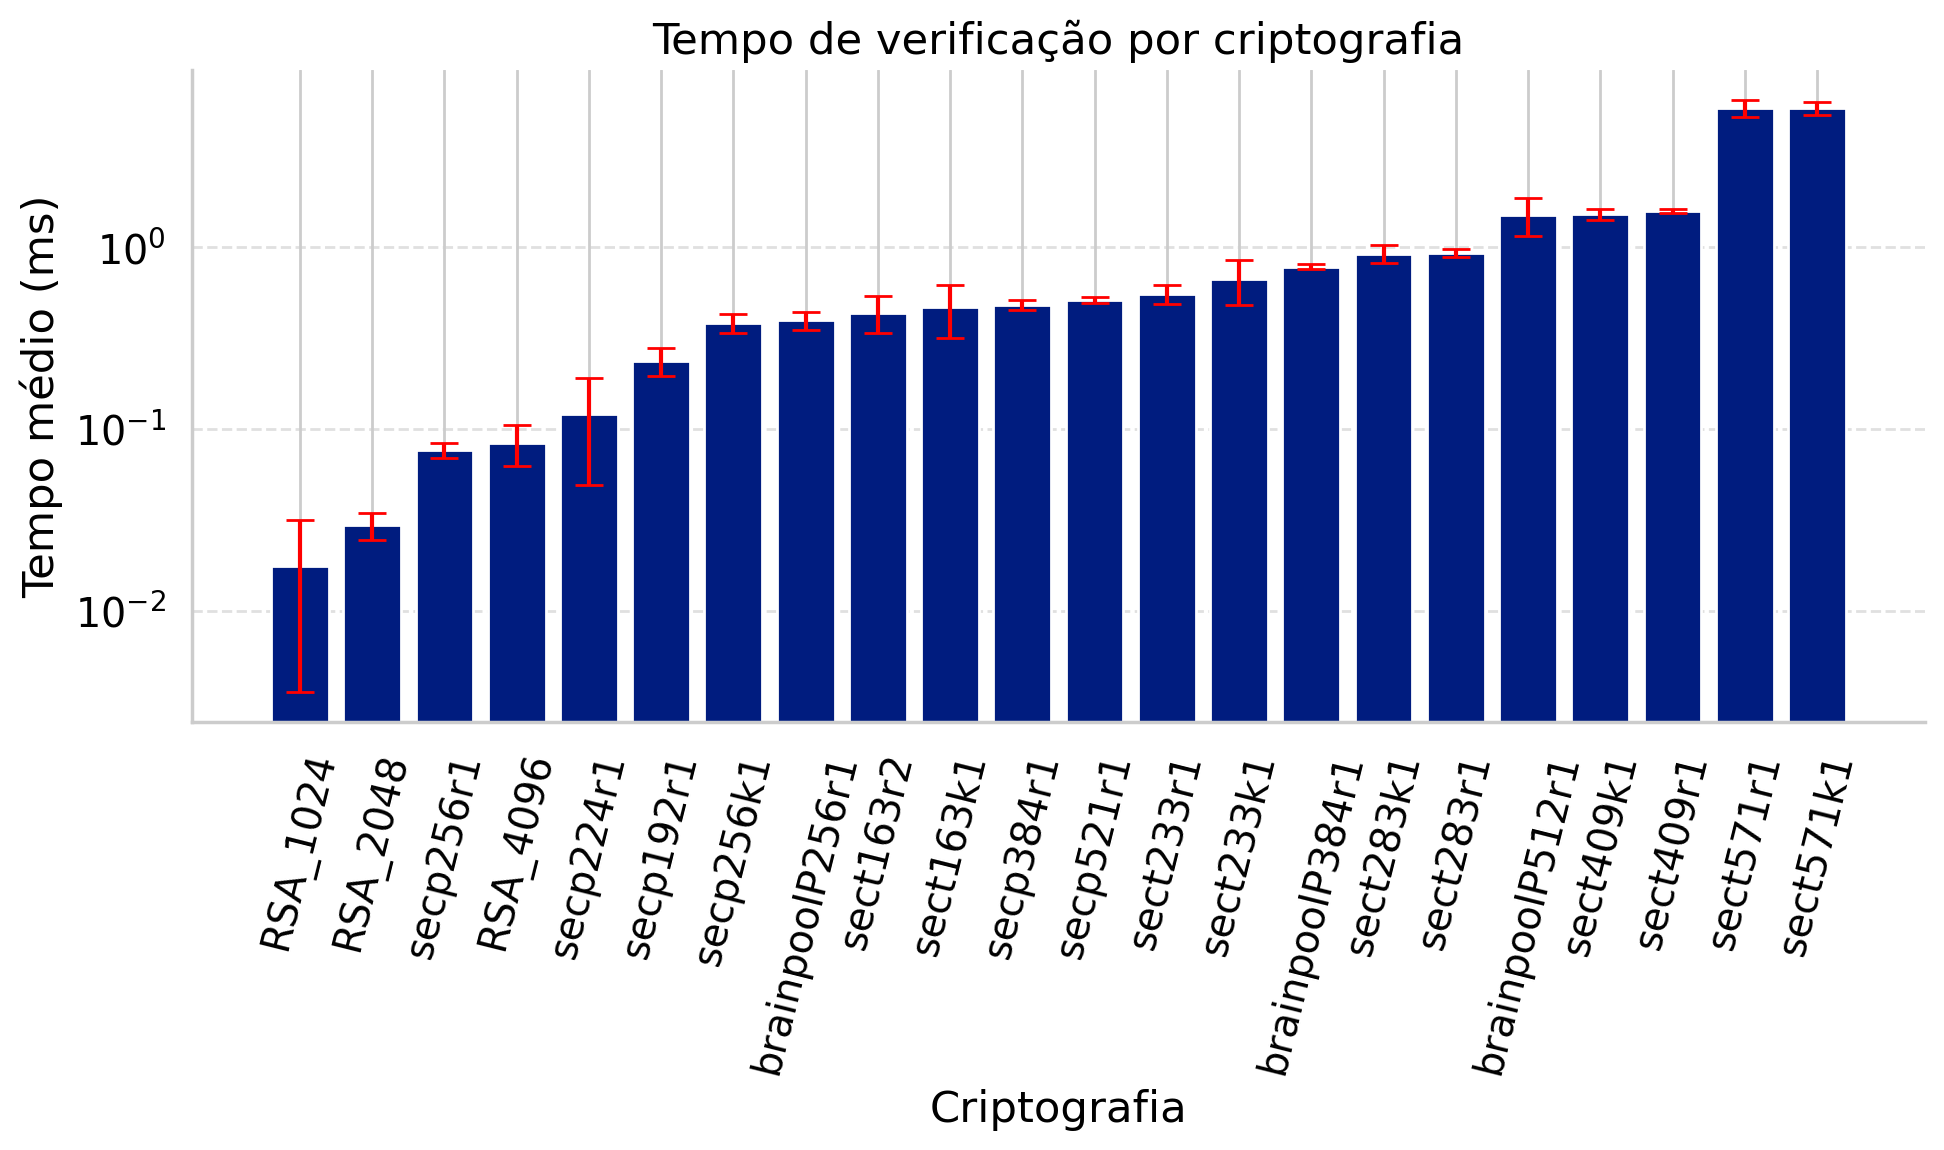

In [ ]:
plot_tempo_medio(resultados, "Tempo de verificação por criptografia")

## Diffie Helmann

In [ ]:
def aux_curve_DH(curva):
  server_private_key = ec.generate_private_key(
      curva
  )

  peer_private_key = ec.generate_private_key(
      curva
  )

  return server_private_key, peer_private_key.public_key()


In [ ]:
n = 100
tempos = {}
for curva in curvas:
  server_private_key, peer_public_key = aux_curve_DH(curva)
  tempo_curva = realizar_medicao(server_private_key.exchange, [ec.ECDH(), peer_public_key], n) / 1e6

  tempos[curva.name] = tempo_curva

resultados = pd.DataFrame(tempos)
resultados.describe()

sect163k1   sect163r2   secp192r1   secp224r1   sect233k1   sect233r1  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.268751    0.199125    0.221755    0.060810    0.262054    0.268807   
std      0.076966    0.039055    0.010487    0.007261    0.047008    0.054507   
min      0.173540    0.181780    0.214300    0.059131    0.235790    0.243710   
25%      0.178943    0.182935    0.216427    0.059247    0.239108    0.245986   
50%      0.314951    0.184670    0.217750    0.059335    0.244051    0.250195   
75%      0.326330    0.189591    0.222818    0.059620    0.259344    0.261759   
max      0.485480    0.344541    0.296311    0.129670    0.437501    0.631042   

        secp256r1   secp256k1  brainpoolP256r1   sect283k1   sect283r1  \
count  100.000000  100.000000       100.000000  100.000000  100.000000   
mean     0.060929    0.418402         0.385473    0.436208    0.523588   
std      0.045847    0.062499         0.087102    0.069747    0.130366   
min      0.053480    0.384920         0.349080    0.407112    0.431522   
25%      0.053760    0.393156         0.355793    0.414184    0.438897   
50%      0.053915    0.395925         0.359050    0.415981    0.473885   
75%      0.054947    0.421983         0.372553    0.421823    0.522371   
max      0.502260    0.905284         0.907540    0.849501    1.023243   

        secp384r1  brainpoolP384r1   sect409k1   sect409r1   secp521r1  \
count  100.000000       100.000000  100.000000  100.000000  100.000000   
mean     0.395914         0.867487    0.758118    0.758822    0.314488   
std      0.094258         0.063478    0.056077    0.042795    0.021487   
min      0.334750         0.828922    0.693611    0.735121    0.303521   
25%      0.339718         0.839072    0.706822    0.743991    0.304645   
50%      0.342975         0.846807    0.771316    0.748201    0.309051   
75%      0.412503         0.865123    0.782968    0.757193    0.313013   
max      0.761160         1.250681    1.075410    1.075272    0.446659   

       brainpoolP512r1   sect571k1   sect571r1  
count       100.000000  100.000000  100.000000  
mean          1.265576    1.568841    1.697043  
std           0.098578    0.070656    0.137444  
min           1.214672    1.524083    1.636312  
25%           1.221540    1.538563    1.643155  
50%           1.232082    1.550382    1.651568  
75%           1.262794    1.573536    1.693925  
max           1.780893    2.057903    2.673734

### Distribuição de frequência

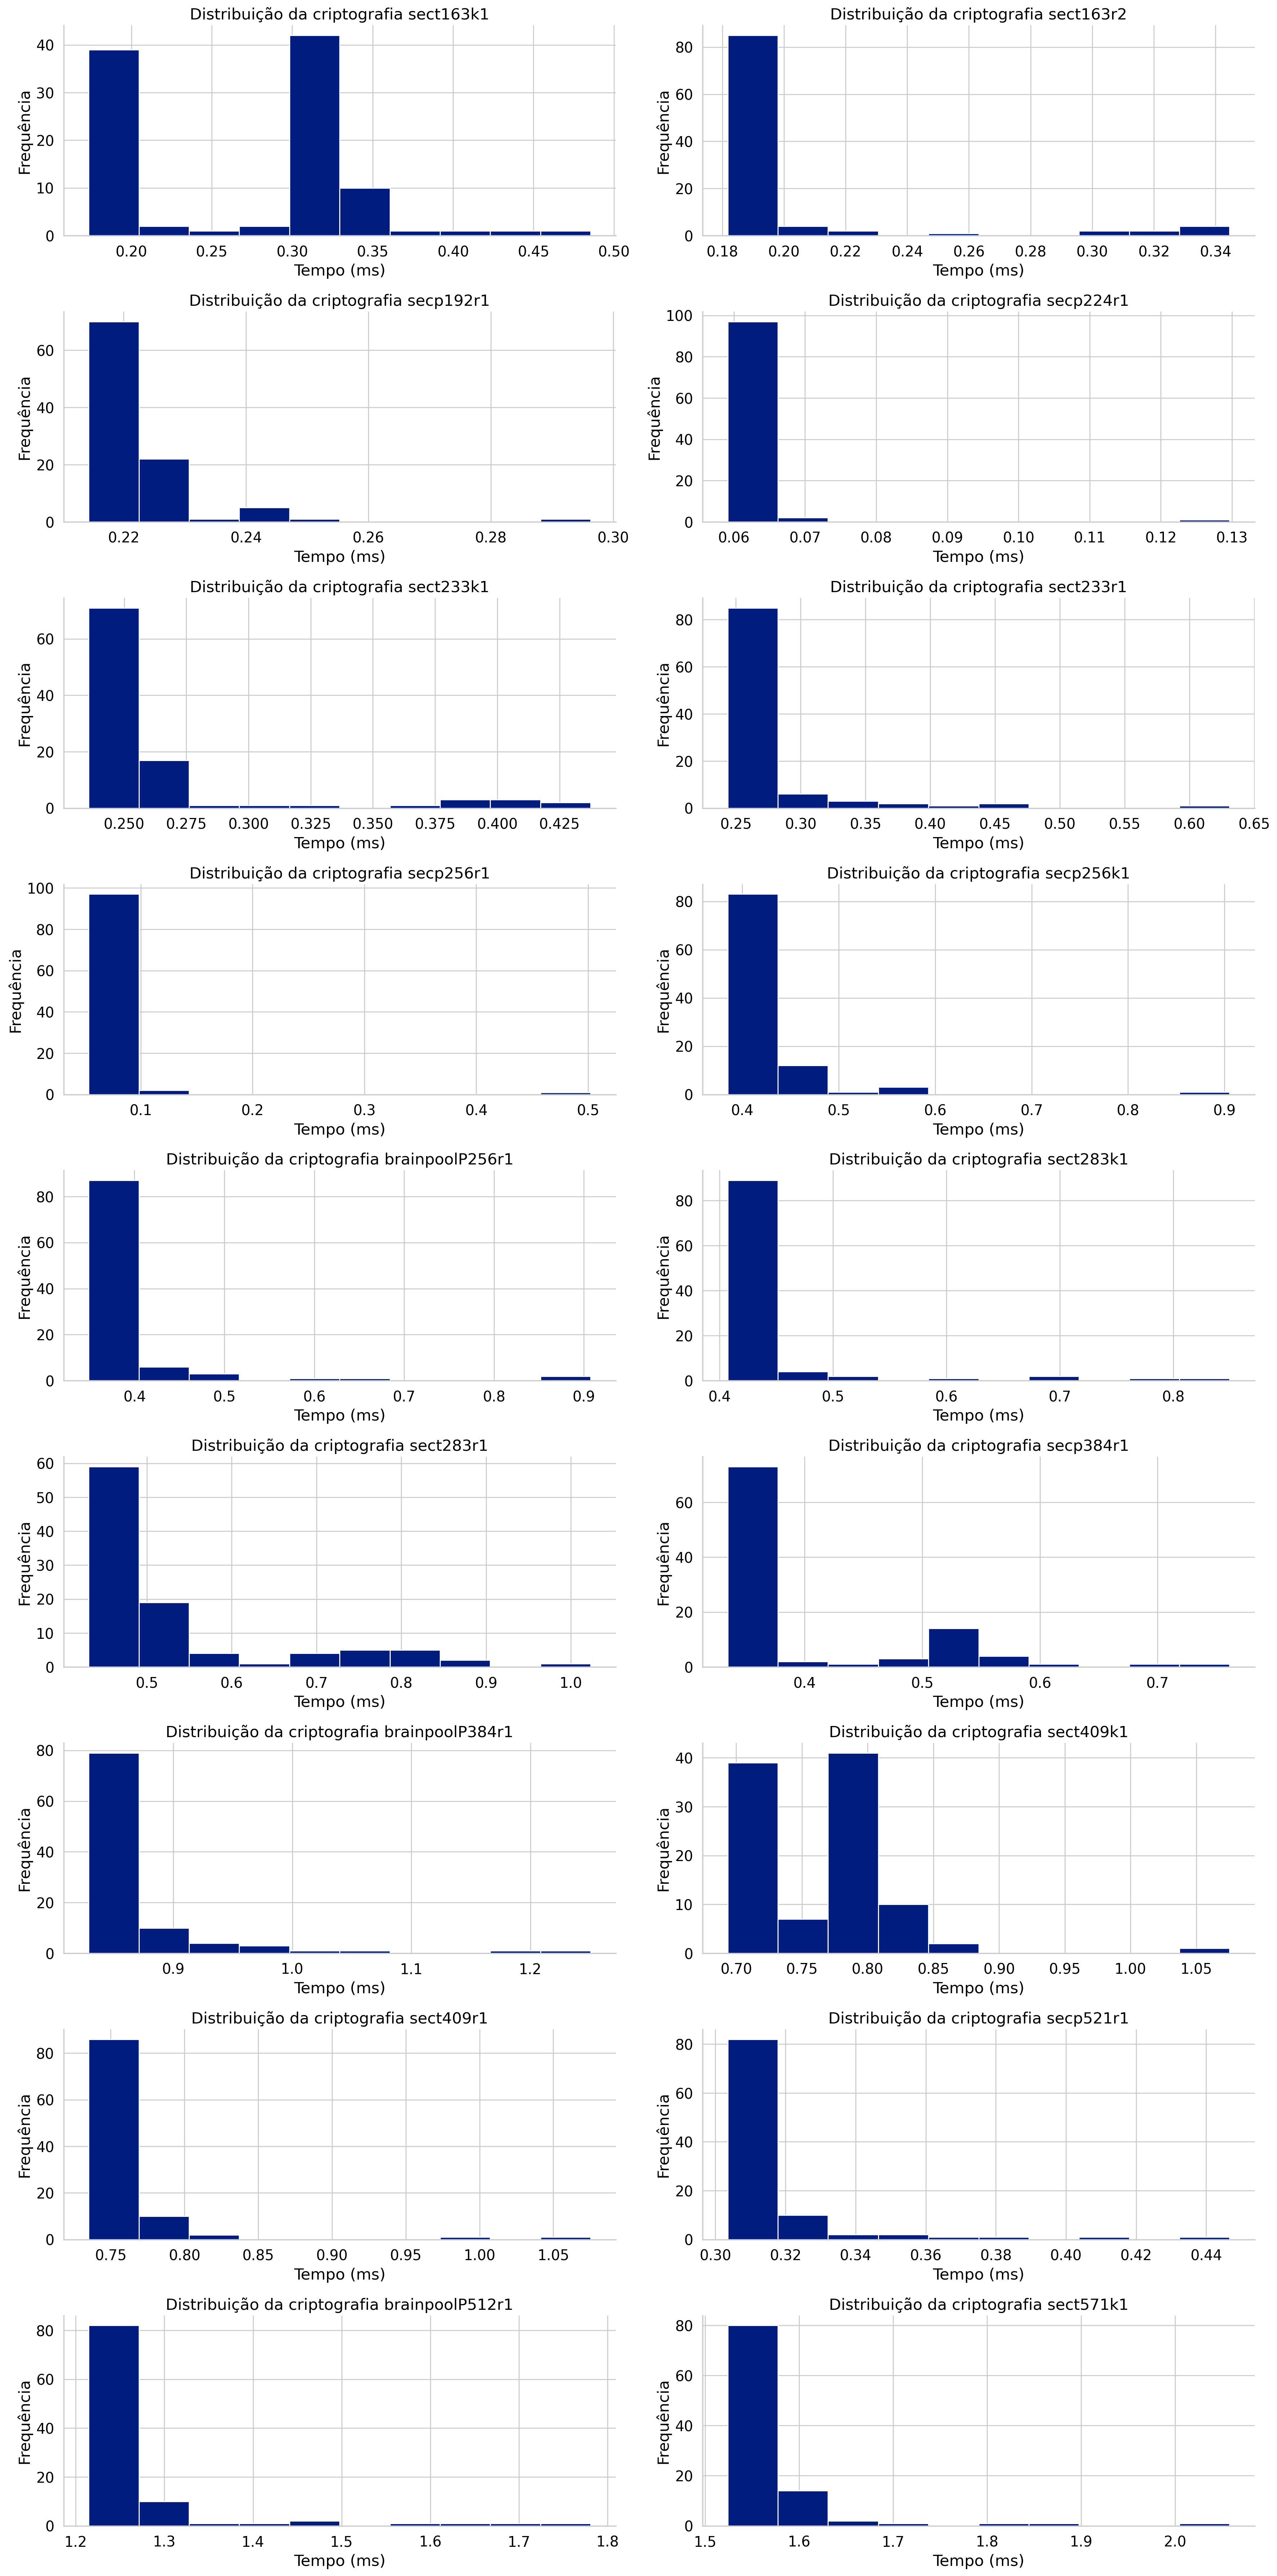

In [ ]:
plot_distribuicao_freq(resultados)

### Tempo Médio

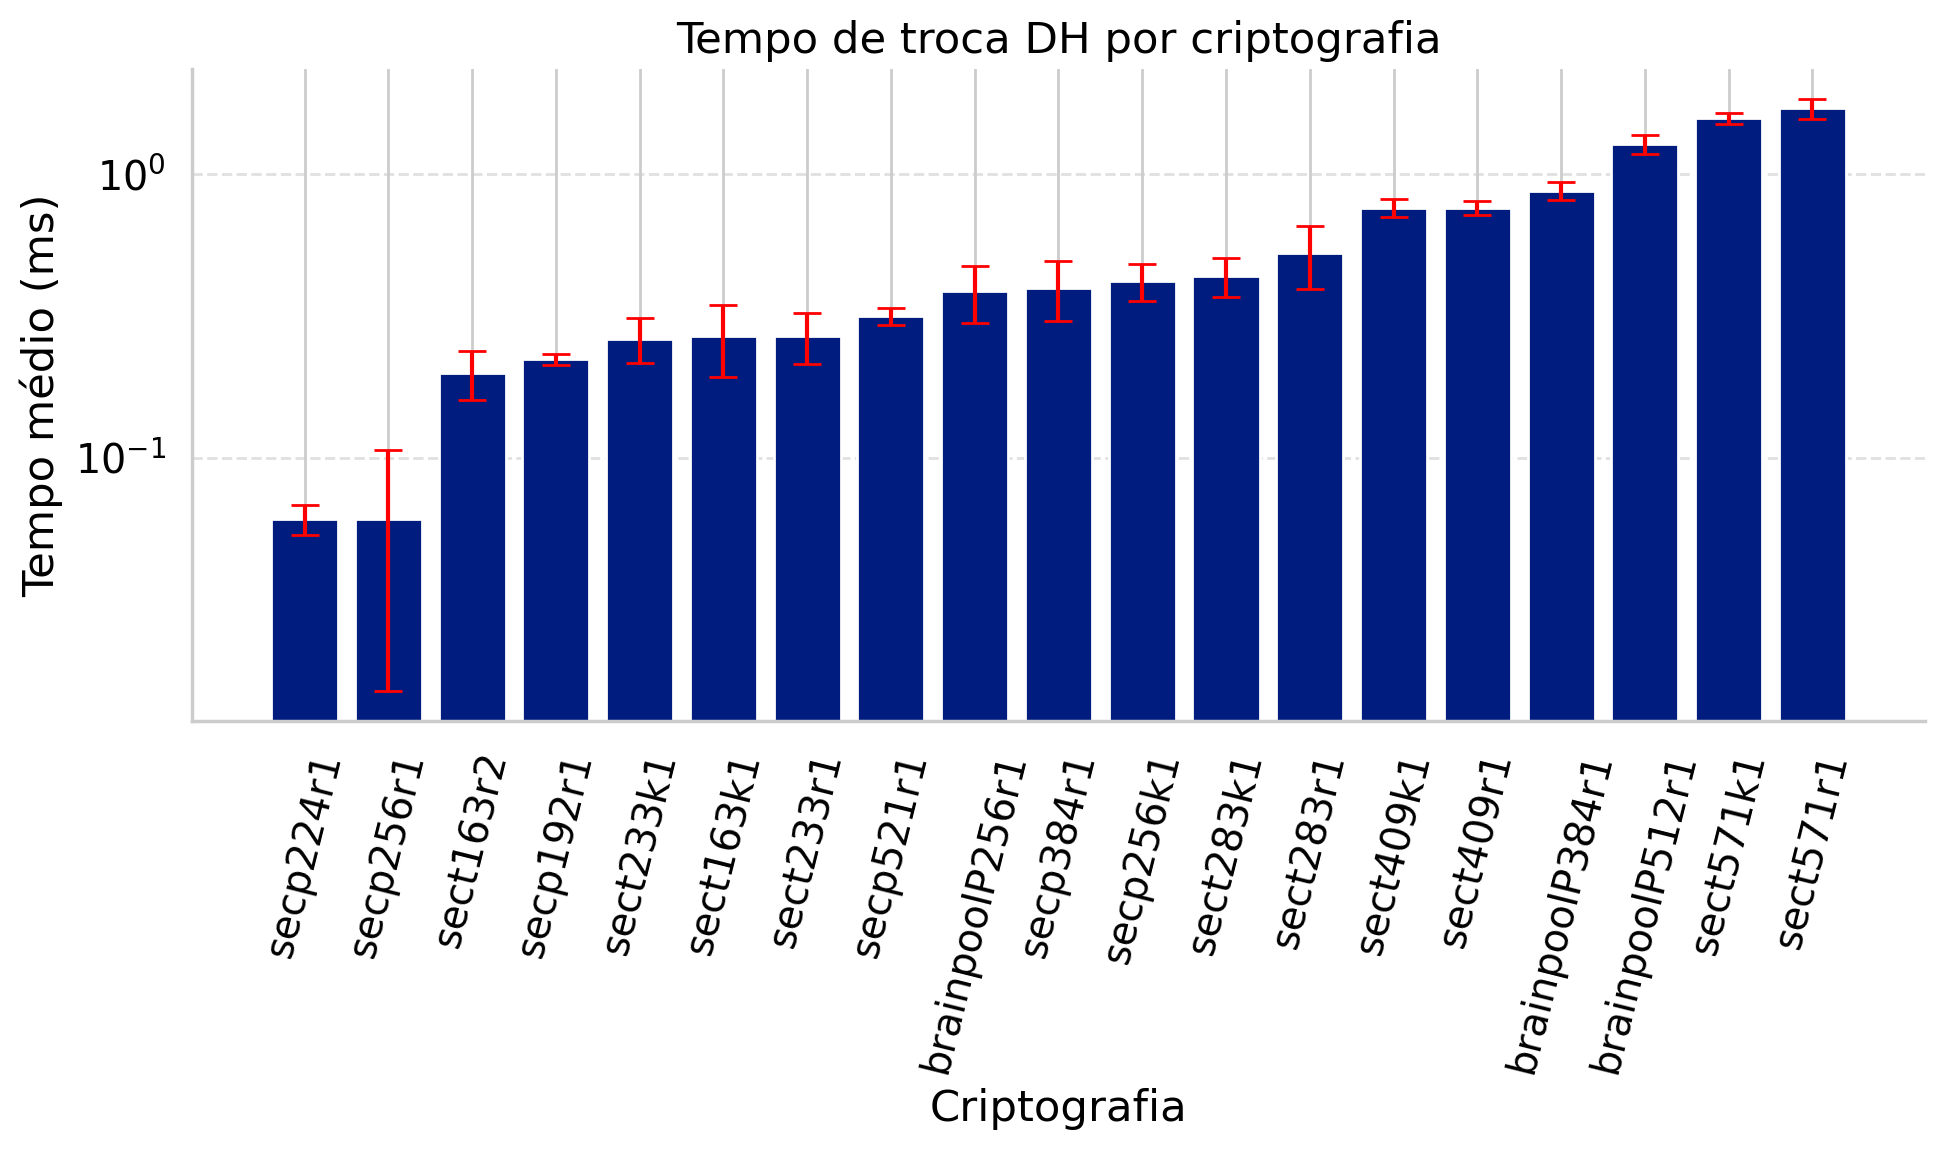

In [ ]:
plot_tempo_medio(resultados, "Tempo de troca DH por criptografia")